**Student Name**: Arno Deceuninck

**Student ID**: s0181217

# Lab 2: Markov Decision Processes

### Instructions: **TODO** tags

This lab on MDPs has two parts:
1. You will need to formulate written scenarios as MDPs.  For this part, please submit drawings of your MDPs - either decent quality photos of sketches, or (if you're feeling fancy) [beautiful tikz graphs](https://www.mathcha.io/editor) (I recommend using the mathcha editor linked here instead of making tikz plots from LaTeX, unless you *really* know what you're doing)
2. In the second half, you will have to implement the MDP from the course. We will use a framework very similar to what we have done before in the Bandits scenario.

As usual, please *read* and *run* the notebook chronologically, and fill in the **TODO**s as you encounter them.
* <span style="color:blue"> Blue **TODOs** </span> means you have to implement the TODOs in the code.
* <span style="color:red"> Red **TODOs** </span> means you have to submit an explanation (of graph/results).

At each section, <span style="color:green"> (xx points) </span> indicates the number of points of the entire section (labs are graded out of 10).

### Images in notebook cells
To attach an image to a notebook cell, you can simply **drag & drop** it in the cell. This will create a link like `![image.png](attachment:image.png)` in the cell where your mouse dropped the image. If you want to **adjust the size** of the image, you can *then* replace the link with `<img src="attachment:image.png" width="500">` and this should generate a plot of required width; simply adjust the `width` parameter then.

**If the drag&dropping is acting up** - sometimes it refuses to paste an image (often the 2nd) in a cell. If this happens, you can create a cell below and paste it there. Sorry for the trouble!


## 1. <span style="color:green"> (6 points) </span> Markov Decision Process Statements
*Course Reminder*: a Markov Decision Process (MDP) is a tuple $M = (\mathcal{S}, \mathcal{A}, \mathcal{R}, \gamma, p)$ with $\mathcal{S}$ a set of states, $\mathcal{A}$ a set of actions, $\mathcal{R}$ a set of rewards, $\gamma$ the discount factor, and crucially $p$ the dynamics function $p\left(s^\prime,r \mid s,a \right)$. An MDP is a mathematical object meant to model non-deterministic decision-making situations.
The MDP formalizes the RL framework, by providing the core elements: the sets of states and actions in which our problem takes place, and the dynamics $p$ that define the environment. All that is left to generate a trajectory is the *policy* $\pi \left(a \mid s\right)$ defining the agent. 

Below you can visualize the **link between the RL framework (in black) and its mathematical formulation (in green), as well as its implementation (blue).**
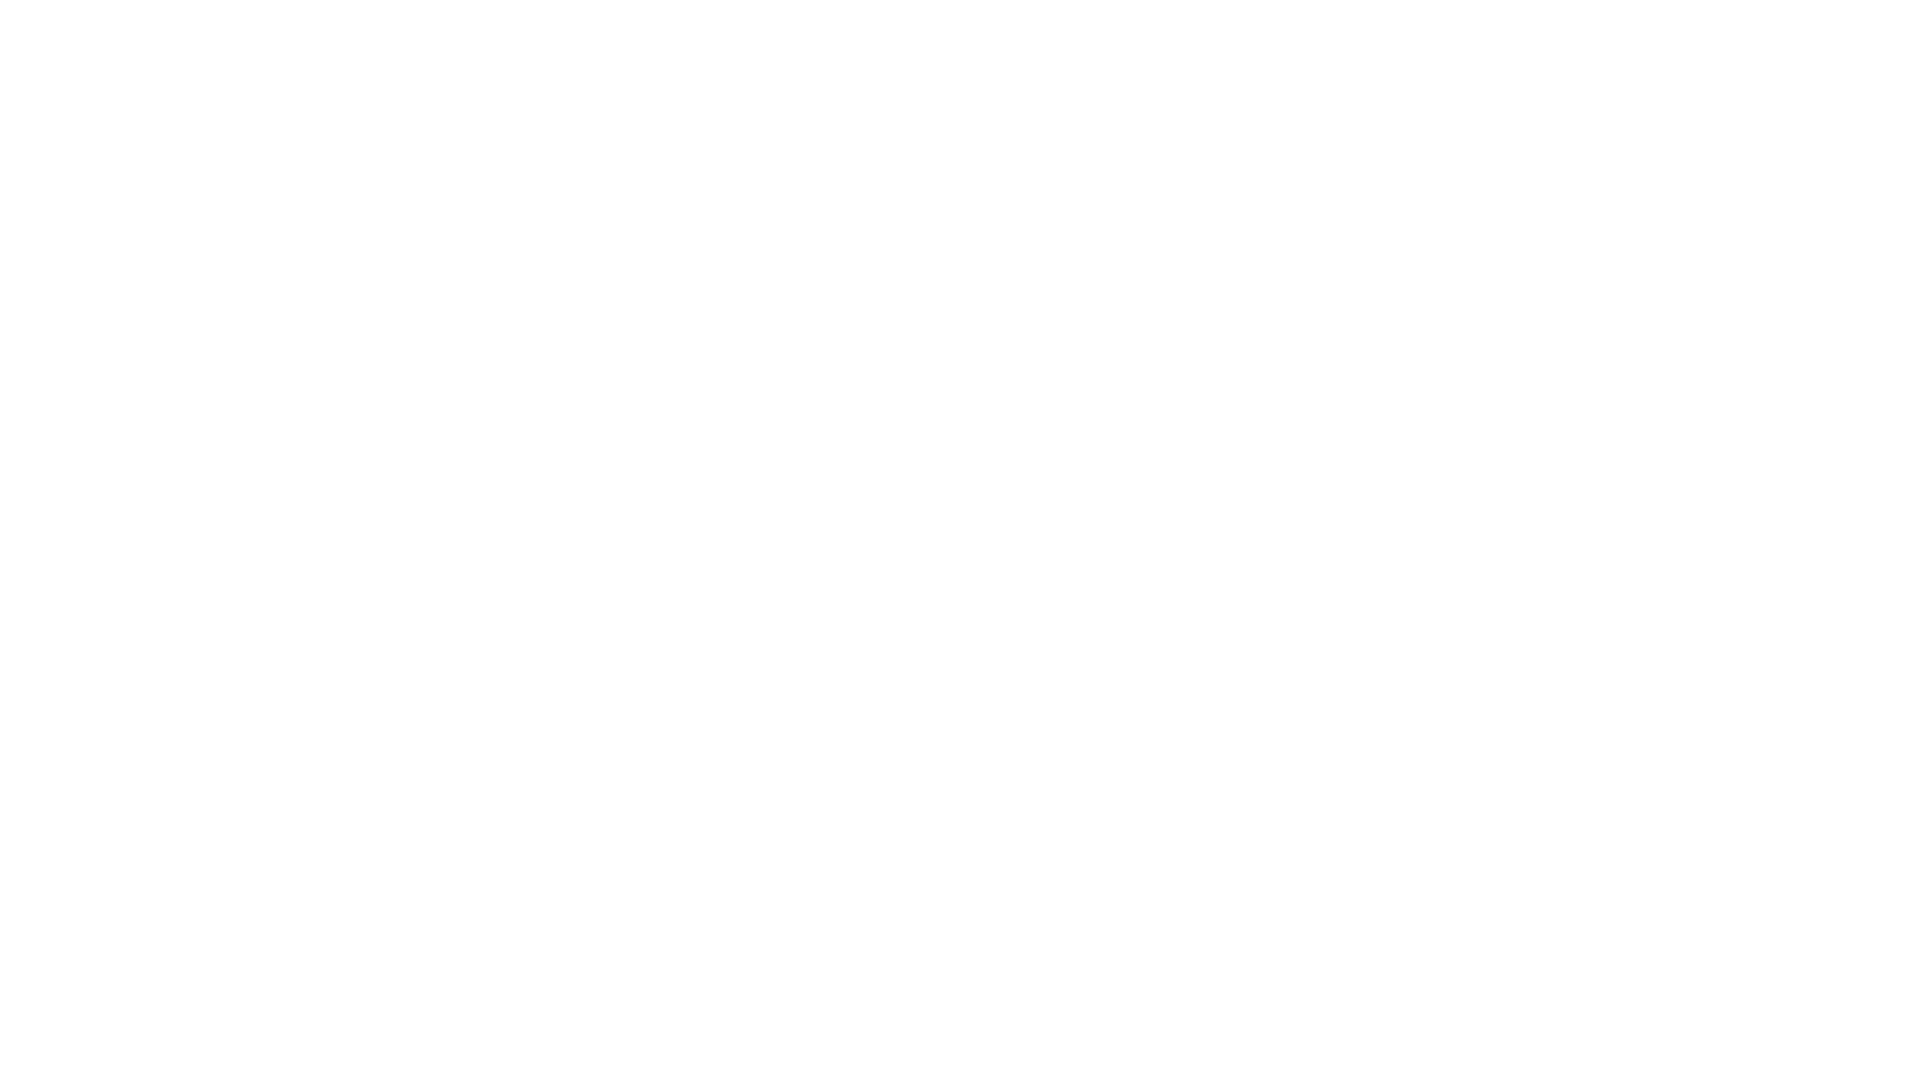


In this lab, you will have to turn written descriptions of problems into MDPs. Please use the convention below for the drawing of your MDPs:

- states as round, white nodes, with the state name inside
- actions as small black nodes sprouting from the states, with the action name closeby
- transition probability and reward on the edge sprouting from the actions and leading to some other state.
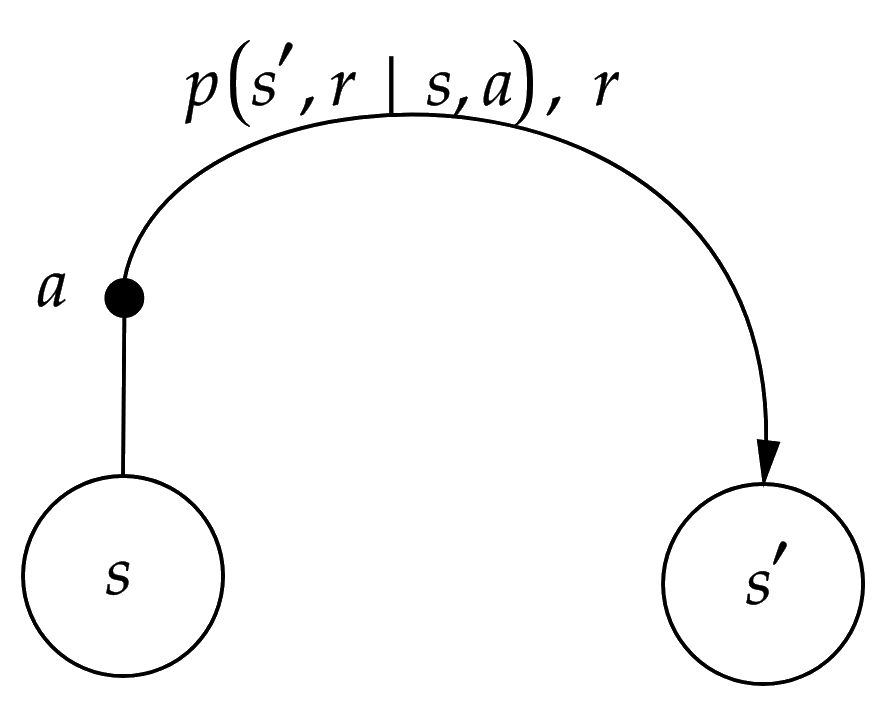

The example below is drawn from the [RL book](http://incompleteideas.net/book/the-book-2nd.html) Chapter 3, page 52, example 3.3; you are encouraged to hop there to understand how to turn a problem statement into an MDP. **Please write actual scalar reward and probability values instead of variable names, unlike in the example below**.
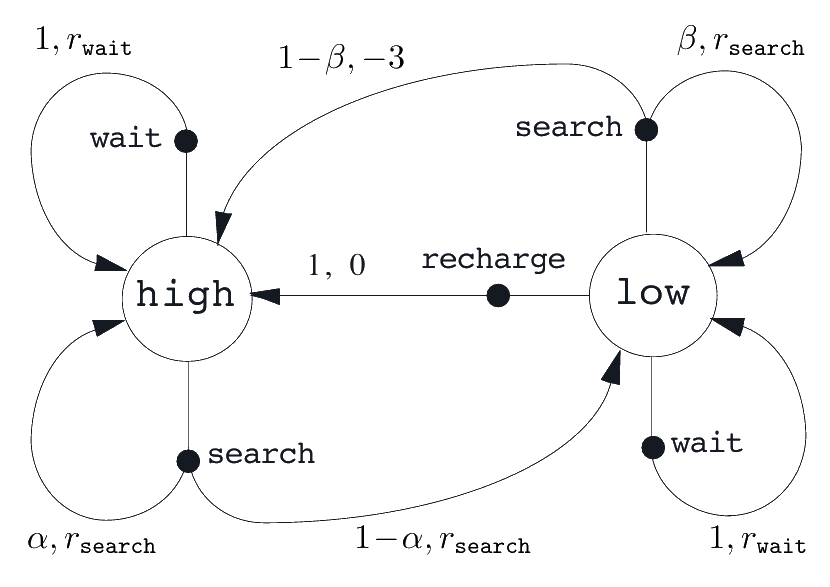
Overall, you can always have this kind of graph in mind when we talk about MDPs, even theoretically.  

### 1.1. Problem statement: a healthy lifestyle
The probabilities and rewards are up to you, but they should be consistent with the problem statement.

> You are a healthy, sane person, but with a weak immune system.
> Every year, you have some probability to get sick, which lowers if you remember to do a health check. When do do a health check and you stay healthy, you sometimes notice it and are happy about it.
> If you are sick, your condition is bad and doing nothing will result in high chances of death, and no chance of recovery whatsoever.
> Your doctor prescribes some medicine for you, which - if you remember to take it- has some probability to cure you. However, even then, chances to die remain, although lowered.

When designing the MDP, make sure that the optimal behavior is to stay healthy and alive!

<span style="color:red"> **DONE** </span>: **Drag & drop** your sketch in this cell below. **Explain** your sketch briefly.

Note: Dragging and dropping an image didn't work (and gave some errors in the javascript console (and also appearantly stopped autosaving my notebook)), so I just added the images in my submission. If the images are unclear, you can also take a look at the pdf of the drawings. 

<img src="RL_Lab2-MDPs-Health.png" width="300">

As long as you're not sick, you get only positive rewards (or 0). Once you're sick, all rewards you get are negative (or 0) until you are cured. You can do a health check each year, which gets you in another state where your chances of getting sick are lower when the year passes. Dying gives you a reward of -1000, so any agent would always try to avoid that. Each time you take a pil, you have a chance of dying, recovering or staying in the cure procedure. Each time you don't take it, you have a higher chance of dying and can't recover that step.  

### 1.2. Problem statement: Bowling
```
          |||
          |||
          _._
        .' ..`.
        |     |  <--- ball
         `---'          

           0
          0 0
         0 0 0   <--- pins
        0 0 0 0
```
We want to model the game of bowling, but we will need to severely simplify it.
The scoring system is quite complex, so let's just say the goal is to hit all the pins in the least tries possible.
The player observes the pins and can choose to throw the ball {left, middle, right}, but the transitions are highly stochastic (player's skill and consistency; hard to know the precise outcome of a throw).
- What would the states of the environment be?
- How many states are there in this environment?
Draw a subset of the MDP (stay below 10 states, abstract out the rest), with initial and terminal state, and some possible transitions from all 3 actions from the start state.

<span style="color:red"> **DONE** </span>: **Drag & drop** your sketch in this cell below. **Answer** the questions and **explain** your sketch briefly.
<img src="RL_Lab2-MDPs-Bowling.png" width="300"> 

Each of the states would represent which of the pins are still standing up and which are thrown over. So each of the 10 pins can be either still standing or fallen over, so we have $2^{10} = 1024$ states for this environment. From any state, you can throw left, middle or right and get to any other state as long as pins that have been knocked over, don't go up again (but some of them with a very (almost impossible) probability, so to keep the drawing less clutered, I didn't draw a transition between al off the states (because e.g. from any state their could be a transition to the terminal state)). As reward, you get the number of pins knocked over, divided by the number of throw it is (e.g. if you knock 6 pins over in the 2nd throw, the reward is $\frac{6}{2} = 10$.

### 1.3. Problem statement: Course's maze
In the slides 7 and 8 of the course, we used a same maze as MDP example:
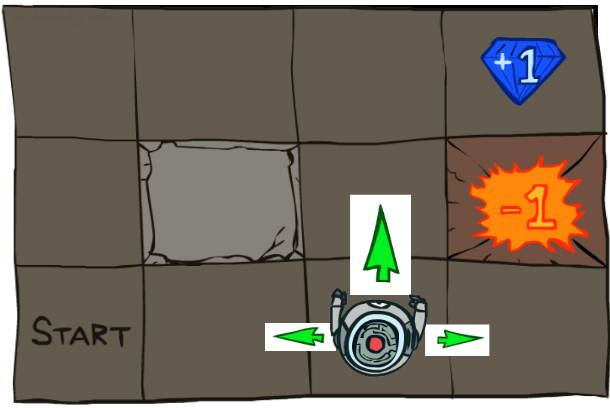

**Draw** the corresponding MDP graph for this problem. A few things need to be clarified:

- Assume no noise. It would make the plot very messy!
- You can use capitals N S E W to shorten the North South East West actions.
- The two states indicated `+1` and `-1` are not yet terminal. They both lead to the same state TERMINAL with unique available action EXIT, and the transition yields the indicated rewards. 
- Assume a small living reward of -0.1 that does not apply for the exit transition.

Note that we could also frame this problem with states indicated `+1` and `-1` being terminal; we do not do this for plotting purposes in the following lab. Stay tuned!

- In addition to the MDP, please **draw** (on the side or on a separate plot) how the **start state** would look if there was `noise=0.2`. As a reminder, the `noise` parameter *in this specific MDP* is the probability that the agent is *not* taking the expected action - e.g. doing west when asked north. In our case, it takes you with equal probability to the two orthogonal states, e.g. when asking North, 10% proba to go East, 10% to go West.

<span style="color:red"> **TODO** </span>: **Drag & drop** your sketch in this cell below. **Answer** the questions and **explain** your sketch briefly.
<img src="RL_Lab2-MDPs-Maze.png" width="300">

Each state represents the position on the board (with it's coordinates). You can't run of the grid or through the stone, so there are no states or transitions for that actions. Once you've achieved the state with the diamond or lava (not sure what it is, the red/orange thing), you can only choose exit as action and end up in the terminal state. 

In the version with noise, I've drawn all incoming and outgoing transitions from the start state and the states relevant for those transitions. Note that I assumed the start state is the cell with the word "Start" on it (and not our case from above, where the robot is already in another cell). Since all those states have only 2 possible directions to go to, all probabilities in this subgraph are either 0.8 (if the desired action has been taken) or 0.2 (if the other action has been taken). 

## 2. <span style="color:green"> (4 points) </span> <span style="color:blue"> **TODO** </span>: MDP Implementation
By now, you should have a solid grasp of the intricacies of the MDP. The time has come to implement one!
We will implement the MDP from the course (statement 4 above). However, unlike when you had to draw it, we will use `noise=0.2`.

There are multiple methods that we want from an MDP. Let's list them:
- <span style="color:blue"> **DONE** </span> `get_states`: returns all the possible states of the MDP. In other words, all the inputs that the *agent can observe*.
- <span style="color:blue"> **DONE** </span> `get_actions`: given a state, returns all the possible actions from that state.
- <span style="color:blue"> **DONE** </span> `p`: the dynamics, for a given state-action input pair. Return all the possible state-reward output pairs, along with the probability for that to happen. 
- <span style="color:blue"> **DONE** </span> `is_terminal`: given a state, returns whether it is terminal.

These methods provide everything we need to know to draw the MDP. However, if we wanted to use it in practice to run an episode - i.e., use the MDP as an *Environment* to interact with, we need a few different methods. The agent needs to start somewhere, in some starting episode sampled from a subset of $\mathcal{S}$ sometimes called $\mathcal{S}_0$. Then, we need to sample from the dynamics to output a state and reward given a state and action. We follow the [`OpenAI gym`](https://gym.openai.com/docs/) convention:
- <span style="color:blue"> **DONE** </span> `reset`: initializes the environment, outputs a starting state.
- <span style="color:blue"> **DONE** </span> `step`: given an action, performs one step in the environment. Formally, samples from the dynamics. For more complex environment like video games however, it is unthinkable to explicitely formulate the dynamics, but it is generally easy to compute a single transition. Outputs the next state, reward, and done signal, i.e. whether we reached a terminal state.

Note that these functions need to keep track of where the agent is. Feel free to add what you want to the `__init__` method if needed.

*Note: Normally in `gym`, the action space would be defined as `Discrete(5)`, meaning 5 possible actions ranging from 0 to 4, since the strings make no actual sense for the agent. In our environment, we will use actions as strings 'north' 'east' etc. for clarity.*

In [44]:
import numpy as np
import gym
from gym import spaces

In [45]:
class CourseEnv(gym.Env):
    """ Gridworld environment from the Course. A 4x3 grid with 2 states in the upper right corner 
    leading to the terminal state.
        """
    def __init__(self):
        self.height = 3
        self.width = 4
        self.observation_space = spaces.Tuple(( # observations come in (x,y) tuples with x:height, y:width.
                spaces.Discrete(self.height),
                spaces.Discrete(self.width)
                ))
        self.actions = ['north', 'east', 'south', 'west', 'exit'] # writing them out for a common convention
        self.noise = .2
        self.start = (2,0)
        self.near_terminals = ((0,3), (1,3)) # state from which there is only the exit action to get to TERMINAL
        self.obstacles = [(1,1)]
        self.living_reward = -0.1
        # You can add elements to this init method if needed.
        self.S = self.start

    def step(self, action):
        """ Moves the agent according to the input action.
        You can either sample from the dynamics, or simply (if it feels easier) code the agent's movement.
        """
        print("Executing action {}".format(action))
        # TODO: implement this step method.
        current_state = self.S

        p_dict = self.p(current_state, action)
        
        actions = list([action_reward[0] for action_reward, prob in p_dict.items()])
        rewards = list([action_reward[1] for action_reward, prob in p_dict.items()])
        probs = list([prob for action_reward, prob in p_dict.items()])

        #x, y = 0, 0
        #if current_state != "TERMINAL":
        #    x, y = current_state
        #action_results = {"north": (x-1, y), "east": (x, y+1), "south": (x+1, y), "west": (x, y-1), "exit": "TERMINAL", None: current_state}

        #print(f"probs: {probs}")
        #print(f"p_dict: {p_dict}")
        chosen_index = np.random.choice(len(actions), p=probs)
        #print(chosen_index)

        reward = rewards[chosen_index]

        #chosen_action = actions[chosen_index]
        #next_state = action_results[chosen_action]
        #print(f"actions: {actions}")
        next_state = actions[chosen_index]
        done = next_state == "TERMINAL"

        self.S = next_state
        return next_state, reward, done, {} # ignore but keep this last element {}; it is within the gym convention.

    def reset(self):
        """ Prepares for a new episode."""
        self.S = self.start
        return self.start
        
    def valid_state(self, state):
        # State is a (x, y) tuple
        x, y = state
        return self.height > x >= 0 and self.width > y >= 0 and state not in self.obstacles
    
    def get_valid_actions(self, state):
        # Returns all valid movements from given state
        available_actions = set()
        x, y = state

        actions = [("north", (x-1, y)), ("east", (x, y+1)), ("south", (x+1, y)), ("west", (x, y-1))]
        for action, new_position in actions:
            if self.valid_state(new_position):
                # print(f"{new_position} is a valid state")
                available_actions.add((action, new_position))
        return available_actions
        
    
    def available_actions(self, state=None):
        """
        List of available actions in the provided state
        Parameters
        ----------
        state: tuple (position), string ('TERMINAL') or None
            state from which to provide all actions. If None, use the current environment state.
        Returns
        -------
        ret : list
            List of all actions available in the provided state.
        """
        if state == "TERMINAL" or state is None:
            return []
        elif state in self.near_terminals:
            return [("exit", state)]
        else:
            return self.get_valid_actions(state)
                
    
    def p(self, state, action):
        """
        Dynamics function p of the MDP in this state and action.
        Parameters
        ----------
        state: tuple (position) or string ('TERMINAL')
            state from which to provide all actions. If the terminal state is provided, raises an error, 
            as there are no dynamics from the terminal state. 
        action: string 
            in list in ['north', 'east', 'south', 'west', 'exit'] with proper state
        Returns
        -------
        ret : dict
            dictionary of (next_state, reward) pairs with: corresponding probabilities
        """
        available_actions = self.available_actions(state)
        if action not in set([action_state[0] for action_state in available_actions]):
            print(f"Not a valid action, staying in the same position, valid actions are {available_actions}")
            return {(state, 0): 1}

        if state == "TERMINAL":
            raise Exception("State is terminal")
            
        if state in self.near_terminals:
            reward = 1 if state == self.near_terminals[0] else -1
            #return {("exit", reward): 1}
            return {("TERMINAL", reward): 1}
            
        # Determine the new state (assuming given action is always valid)
        x, y = state
        action_dict = {"north": (x-1, y), "east": (x, y+1), "south": (x+1, y), "west": (x, y-1)}
        new_state = action_dict[action]
        
        p_dict = {(new_state, self.living_reward): 1-self.noise}
        
        noise_actions = self.get_valid_actions(state)
        for noise_action, new_position in noise_actions:
            if noise_action != action:
                probability = self.noise / (len(noise_actions)-1) # -1 because of the chosen action itself
                reward = self.living_reward
                if new_position == (0, 3):
                    reward = -1
                elif new_position == (1, 3):
                    reward = 1
                p_dict[(new_position, reward)] = probability

        return p_dict
    
    def is_terminal(self, state=None):
        """
        Whether the input state is terminal (string 'TERMINAL').
        If no input state is provided, use the self.S state (assumes there is an ongoing episode).
        Parameters
        ----------
        state: tuple (position), string ('TERMINAL') or None
            state from the environment. If None is provided, use the self.S state. 
        Returns
        -------
        ret : bool
            Boolean indicating whether the state is terminal.
        """
        if state is None:
            state = self.S

        return state == "TERMINAL"
    
    def states(self):
        """
        Set (as a list) of all states of the MDP, i.e. set $\mathcal{S}$
        Returns
        -------
        ret : list
            List of all possible states in the environment.
        """
        # TODO: implement this get_states method.
        return set([(x, y) for x in range(self.width) for y in range(self.height) if (x, y) not in self.obstacles])

        
    def render(self):
        """ This method is provided to you. 
        Use this to plot the current position of an agent in your environment.
        """
        s = np.zeros((self.height, self.width), dtype=int).astype(str)
        s[self.start] = 'S'
        s[self.obstacles[0]] = 'X'
        s[self.near_terminals[0]] = '+'
        s[self.near_terminals[1]] = '-'
        #print(f"State: {self.S}")
        s[self.S] = '.'
        
        print(self.S)
        print(s)
        # you can uncomment the following line when the available_actions method is implemented:
        # print("Available actions: {}".format(self.available_actions()))


Let's test the different functions of your MDP. <span style="color:red"> **TODO** </span> **Run** the following cells and check that the outputs make sense.

In [46]:
mdp = CourseEnv()

In [47]:
mdp.states()

{(0, 0),
 (0, 1),
 (0, 2),
 (1, 0),
 (1, 2),
 (2, 0),
 (2, 1),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 2)}

In [48]:
print(mdp.available_actions((0,0)))
print(mdp.available_actions((0,3)))
print(mdp.available_actions('TERMINAL'))

{('south', (1, 0)), ('east', (0, 1))}
[('exit', (0, 3))]
[]


In [49]:
mdp.p((0,0), 'north')

Not a valid action, staying in the same position, valid actions are {('south', (1, 0)), ('east', (0, 1))}


{((0, 0), 0): 1}

In [50]:
print(mdp.is_terminal((0,0)))
print(mdp.is_terminal((0,3)))
print(mdp.is_terminal('TERMINAL'))

False
False
True


Now play your environment! <span style="color:red"> **TODO** </span> Please submit your notebook with an episode that shows **a successful trajectory** (reaching the positive reward) **and the existence of the obstacle** (the agent cannot step on it).

In [51]:
env = mdp
state = env.reset()
total_r = 0
steps = 0
while True:
    env.render()
    action = input("Please input an action: ")
    state, reward, done, info = env.step(action)
    total_r += reward
    steps += 1
    if done:
        break

print("Done in {} steps with total reward {}".format(steps, total_r))

(2, 0)
[['0' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['.' '0' '0' '0']]
Please input an action: north
Executing action north
(1, 0)
[['0' '0' '0' '+']
 ['.' 'X' '0' '-']
 ['S' '0' '0' '0']]
Please input an action: north
Executing action north
(0, 0)
[['.' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Please input an action: east
Executing action east
(1, 0)
[['0' '0' '0' '+']
 ['.' 'X' '0' '-']
 ['S' '0' '0' '0']]
Please input an action: north
Executing action north
(0, 0)
[['.' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Please input an action: east
Executing action east
(0, 1)
[['0' '.' '0' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Please input an action: east
Executing action east
(0, 2)
[['0' '0' '.' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Please input an action: east
Executing action east
(0, 3)
[['0' '0' '0' '.']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Please input an action: exit
Executing action exit
Done in 8 steps with total reward 0.30000000000000004
